### About Dataset:

#### The data was acquired from Kaggle (public dataset) to predict the Health Insurance Charges https://www.kaggle.com/datasets/thedevastator/prediction-of-insurance-charges-using-age-gender .

#### Data Includes:

##### * Age	The age of the customer. (Integer)
##### * Children	The number of children the customer has. (Integer)
##### * Smoker	Whether or not the customer is a smoker. (Boolean)
##### * Region	The region the customer lives in. (String)
##### * Charges	The insurance charges for the customer. (Float)



### Problem Statement:
##### * Using age, sex and bmi to create an algorithm for assessing life insurance costs.
##### * Predicting costs for certain patients based on their sex, age, bmi and region to help doctors decide what treatments work best financially for them.
##### * Creating a cost calculator that takes into account the patient’s age, sex, smoker status, region of residence and other factors to accurately predict the medical bills a person will pay in a year.

#### Import Libraries

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("insurance.csv")

#### Get information on data 

In [3]:
# Check Head of Data
data.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Check Tail of Data
data.tail()

,index,age,sex,bmi,children,smoker,region,charges
1333,1333,50,male,30.97,3,no,northwest,10600.5483
1334,1334,18,female,31.92,0,no,northeast,2205.9808
1335,1335,18,female,36.85,0,no,southeast,1629.8335
1336,1336,21,female,25.80,0,no,southwest,2007.9450
1337,1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# Finding and printing number of rows and columns in data
data.shape
print("Number of rows",data.shape[0])
print("Number of rows",data.shape[1])

Number of rows 1338
Number of rows 8


In [6]:
# Finding data information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [7]:
# Checking for null values
data.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Get overall Statistics of Dataset

In [8]:
data.describe(include='all')

,index,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,NaN,2,NaN,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,NaN,676,NaN,NaN,1064,364,NaN
mean,668.500000,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,386.391641,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,0.000000,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,334.250000,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,668.500000,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,1002.750000,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


####  Converting Data from String to Numerical Values

In [9]:
# Converting columns from String [ Sex, Smoker, Region] to numerical Values
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [10]:
data['sex']=data['sex'].map({'female':1,'male':0})

In [11]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [13]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
data['region']=data['region'].map({'northeast':1,'northwest':2, 'southeast':3,'southwest':4})

In [15]:
data.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,1,27.900,0,1,4,16884.92400
1,1,18,0,33.770,1,0,3,1725.55230
2,2,28,0,33.000,3,0,3,4449.46200
3,3,33,0,22.705,0,0,2,21984.47061
4,4,32,0,28.880,0,0,2,3866.85520


#### Store Feature Matrix In X and Response(Target) In Vector y

In [16]:
#Store Feature Matrix in X and Response(Target) in  Vector Y
data.columns

Index(['index', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [17]:
X=data.drop(['charges'],axis=1)
X

,index,age,sex,bmi,children,smoker,region
0,0,19,1,27.900,0,1,4
1,1,18,0,33.770,1,0,3
2,2,28,0,33.000,3,0,3
3,3,33,0,22.705,0,0,2
4,4,32,0,28.880,0,0,2
...,...,...,...,...,...,...,...
1333,1333,50,0,30.970,3,0,2
1334,1334,18,1,31.920,0,0,1
1335,1335,18,1,36.850,0,0,3
1336,1336,21,1,25.800,0,0,4


In [18]:
y= data['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

#### Train/Test split
##### *  Split data into two part : a training set and a testing set
##### *  Train the model(s) on training set
##### *  Test the Model(s) on Testing set

In [19]:
# Importing Required libraries for testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [20]:
X_train

,index,age,sex,bmi,children,smoker,region
737,737,26,0,23.700,2,0,4
369,369,18,0,30.400,3,0,1
284,284,52,1,31.200,0,0,4
1302,1302,25,1,20.800,1,0,4
958,958,43,0,34.960,1,1,1
...,...,...,...,...,...,...,...
1330,1330,57,1,25.740,2,0,3
1016,1016,19,1,24.605,1,0,2
165,165,47,0,28.215,4,0,1
7,7,37,1,27.740,3,0,2


In [21]:
y_train

737      3484.33100
369      3481.86800
284      9625.92000
1302     3208.78700
958     41034.22140
           ...     
1330    12629.16560
1016     2709.24395
165     10407.08585
7        7281.50560
219     25081.76784
Name: charges, Length: 1070, dtype: float64

In [22]:
#import the models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
# model training
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [24]:
# prediction on Test data
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [25]:
df1

,Actual,Lr,svm,rf,gr
1099,3227.12110,5903.981729,9402.953278,8475.344350,5437.689845
759,36307.79830,28374.192212,9399.908708,37801.408176,36956.882931
215,7371.77200,10852.635419,9403.306952,7578.369517,6801.401989
903,8125.78450,12176.681629,9401.432877,11200.134187,10181.298310
989,14571.89080,24971.826041,9401.703598,15689.753175,16516.583562
...,...,...,...,...,...
408,6652.52880,5750.545027,9401.474977,8898.532206,6760.197115
466,13224.69300,12522.184021,9401.533377,17378.305221,15482.125265
724,10106.13425,10429.205304,9400.519383,12510.017148,10954.896221
693,2352.96845,1702.191982,9399.881399,2538.231223,3449.254278


##### Compare Performance Visually

In [26]:
#import Required Libraries
import matplotlib.pyplot as plt

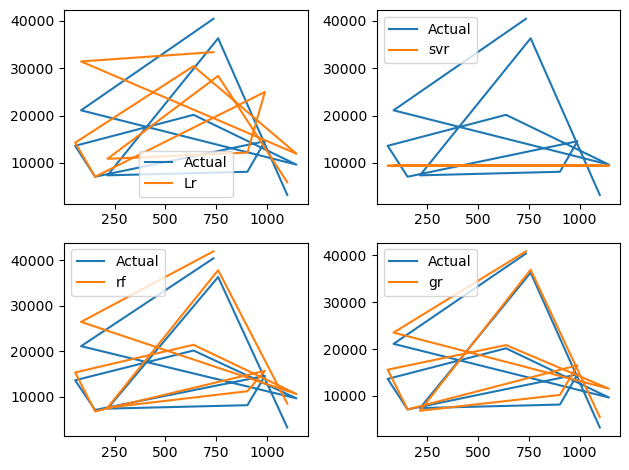

In [27]:
# Visualizing models by subplotting
# Comparing Actual Model and 1st 10 values of predicted values
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

#### Evaluation


In [28]:
#Evaluation: by r2(to measure goodness)
#import required libraries
from sklearn import metrics
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [29]:
print(score1,score2,score3,score4)

0.732951591954033 -0.09017126925241725 0.841648728589404 0.8612688828039081


In [30]:
# retest using mean absolute error
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [31]:
print(s1,s2,s3,s4)

4374.706737263711 8489.394031948208 2701.6830662326493 2445.17042307192


####  Predict Charges For New Model Customer

In [32]:
#Predict model for new customer
data = {'index':0,
        'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2,}
df = pd.DataFrame(data, index=[0])
df

,index,age,sex,bmi,children,smoker,region
0,0,40,1,40.3,4,1,2


In [33]:
#Prediction test
new_pred1=gr.predict(df)
print("Predeiction cost for new customer=",new_pred1)

Predeiction cost for new customer= [42488.828178]


#### Using Gradient Boosting Regression for prediction from Dataset

In [34]:
#prediction training for dataset using Gradient Boosting Regression :From above conclusion
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

#### Import Model for Prediction Test 

In [35]:
#import to save model and execution
import joblib
joblib.dump(gr,"model_joblib_gr")

['model_joblib_gr']

In [36]:
model=joblib.load('model_joblib_gr')

In [37]:
pred=model.predict(df)
print("Insurance cost for customer=",pred)

Insurance cost for customer= [43156.30620265]


#### Insurance cost prediction for model customer=43157